In [1]:
import networkx as nx
import numpy as np
import random
import nltk

In [2]:
letters = ['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p',
           'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l',
           'z', 'x', 'c', 'v', 'b', 'n', 'm']

In [3]:
f = open('words/google-10000-english.txt', 'r')
words = f.readlines()
words = [word.rstrip() for word in words if len(word.rstrip()) > 1]

In [4]:
def define_graph(G_left, G_right):
    G_left.add_nodes_from(range(0,15))
    G_right.add_nodes_from(range(0,11))

    G_left.add_edge(0, 1)
    G_left.add_edge(0, 5)
    G_left.add_edge(0, 6)

    G_left.add_edge(1, 2)
    G_left.add_edge(1, 5)
    G_left.add_edge(1, 6)
    G_left.add_edge(1, 7)

    G_left.add_edge(2, 3)
    G_left.add_edge(2, 6)
    G_left.add_edge(2, 7)
    G_left.add_edge(2, 8)

    G_left.add_edge(3, 4)
    G_left.add_edge(3, 7)
    G_left.add_edge(3, 8)
    G_left.add_edge(3, 9)

    G_left.add_edge(4, 8)
    G_left.add_edge(4, 9)

    G_left.add_edge(5, 6)
    G_left.add_edge(5, 10)
    G_left.add_edge(5, 11)

    G_left.add_edge(6, 7)
    G_left.add_edge(6, 10)
    G_left.add_edge(6, 11)
    G_left.add_edge(6, 12)

    G_left.add_edge(7, 8)
    G_left.add_edge(7, 11)
    G_left.add_edge(7, 12)
    G_left.add_edge(7, 13)

    G_left.add_edge(8, 9)
    G_left.add_edge(8, 12)
    G_left.add_edge(8, 13)
    G_left.add_edge(8, 14)

    G_left.add_edge(9, 13)
    G_left.add_edge(9, 14)

    G_left.add_edge(10, 11)
    G_left.add_edge(11, 12)
    G_left.add_edge(12, 13)
    G_left.add_edge(13, 14)


    G_right.add_edge(0, 1)
    G_right.add_edge(0, 5)
    G_right.add_edge(0, 6)

    G_right.add_edge(1, 2)
    G_right.add_edge(1, 5)
    G_right.add_edge(1, 6)
    G_right.add_edge(1, 7)

    G_right.add_edge(2, 3)
    G_right.add_edge(2, 6)
    G_right.add_edge(2, 7)
    G_right.add_edge(2, 8)

    G_right.add_edge(3, 4)
    G_right.add_edge(3, 7)
    G_right.add_edge(3, 8)

    G_right.add_edge(4, 8)

    G_right.add_edge(5, 6)
    G_right.add_edge(5, 9)
    G_right.add_edge(5, 10)

    G_right.add_edge(6, 7)
    G_right.add_edge(6, 9)
    G_right.add_edge(6, 10)

    G_right.add_edge(7, 8)
    G_right.add_edge(9, 10)

In [5]:
def make_rnd_keyboard_layout(G_left, G_right):
    left_attrs = {}
    right_attrs = {}
    
    tmp = letters.copy()
    for i in range(15):
        left_letter = random.choice(tmp)
        left_attrs[i] = left_letter
        tmp.remove(left_letter)
        
        if i <= 10:
            right_letter = random.choice(tmp)
            right_attrs[i] = right_letter
            tmp.remove(right_letter)
    G_left = nx.relabel_nodes(G_left, left_attrs)
    G_right = nx.relabel_nodes(G_right, right_attrs)
    return G_left, G_right

In [6]:
def create_graphs_dict(num:int):
    d_left = {}
    d_right = {}
    for i in range(num):
        d_left["{0}".format(i)] = nx.Graph()
        d_right["{0}".format(i)] = nx.Graph()
        define_graph(d_left["{0}".format(i)], d_right["{0}".format(i)])
        d_left["{0}".format(i)],d_right["{0}".format(i)] =  make_rnd_keyboard_layout(d_left["{0}".format(i)], d_right["{0}".format(i)])
        
    return d_left, d_right

In [23]:
d_left, d_right = create_graphs_dict(2)

In [57]:
def mutation(G_left, G_right):
    indexes = random.sample(range(26), 2)
    G_left_list = list(G_left.nodes)
    G_right_list = list(G_right.nodes)
    
    if indexes[0] <= 14 and indexes[1] <= 14:
        l = G_left_list[indexes[0]]
        r = G_left_list[indexes[1]]

        G_left = nx.relabel_nodes(G_left, {l:r, r:l})        
    elif indexes[0] <= 14 and indexes[1] > 14:
        l = G_left_list[indexes[0]]
        r = G_right_list[indexes[1]-15]
        
        G_left = nx.relabel_nodes(G_left, {l:r})
        G_right = nx.relabel_nodes(G_right, {r:l})
    elif indexes[0] > 14 and indexes[1] <= 14:
        l = G_left_list[indexes[1]]
        r = G_right_list[indexes[0]-15]
        
        G_left = nx.relabel_nodes(G_left, {l:r})
        G_right = nx.relabel_nodes(G_right, {r:l})
    elif indexes[0] > 14 and indexes[1] > 14:
        l = G_right_list[indexes[0]-15]
        r = G_right_list[indexes[1]-15]
        
        G_right = nx.relabel_nodes(G_right, {l:r, r:l})   
    
mutation(d_left['0'], d_right['0'])

In [59]:
def set_keyboard_layout(G_left, G_right, tab):
    left_attrs = {}
    right_attrs = {}

    for i in range(15):
        left_attrs[i] = tab[i]
    for i in range(11):
        right_attrs[i] = tab[15+i]

    G_left = nx.relabel_nodes(G_left, left_attrs)
    G_right = nx.relabel_nodes(G_right, right_attrs)

    return G_left, G_right

In [67]:
def crossover(G_left1, G_right1, G_left2, G_right2):
    """Executes a partially matched crossover (PMX) on the input individuals"""
    ind1, ind2 = [], []  
    G_left_list1, G_left_list2 = list(G_left1.nodes), list(G_left2.nodes)
    G_right_list1, G_right_list2 = list(G_right1.nodes), list(G_right2.nodes)
    
    for i in range(15):
        ind1.append(G_left_list1[i])
        ind2.append(G_left_list2[i])
    for i in range(11):
        ind1.append(G_right_list1[i])
        ind2.append(G_right_list2[i])
    
    size = min(len(ind1), len(ind2))
    p1, p2 = [0] * size, [0] * size
    
    cxpoint1 = random.randint(0, size)
    cxpoint2 = random.randint(0, size - 1)
    
    if cxpoint2 >= cxpoint1:
        pass
    else:  # Swap the two cx points
        cxpoint1, cxpoint2 = cxpoint2, cxpoint1
        
    for i in range(cxpoint1, cxpoint2+1):
        temp1 = ind1.index(ind1[i])
        temp2 = ind2.index(ind2[i])
        # Swap the matched value
        ind1[i], ind1[p1[temp2]] = ind2[i], ind1[i]
        ind2[i], ind2[p2[temp1]] = ind1[i], ind2[i]
        # Position bookkeeping
        p1[temp1], p1[temp2] = p1[temp2], p1[temp1]
        p2[temp1], p2[temp2] = p2[temp2], p2[temp1]
        
    set_keyboard_layout(G_left1, G_right1, ind1)
    set_keyboard_layout(G_left2, G_right2, ind2)

In [68]:
crossover(d_left['0'], d_right['0'], d_left['1'], d_right['1'])

In [61]:
def score_word(word, G_left_nodes, G_right_nodes, spl_G_left, spl_G_right):
    hand = 'left' if word[0] in G_left_nodes else 'right'
    sum_lenght = 0
    for i in range(len(word)-1):
        if hand == 'left':
#             print('left')
            if word[i+1] in G_left_nodes:
                sum_lenght += spl_G_left[word[i]][word[i+1]]
            else:
                sum_lenght += 1
                hand = 'right'
        else:
#             print('right')
            if word[i+1] in G_right_nodes:
                sum_lenght += spl_G_right[word[i]][word[i+1]]
            else:
                sum_lenght += 1
                hand = 'left'
    return sum_lenght

In [62]:
def score(word_list, G_left, G_right):
    G_left_nodes = G_left.nodes()
    G_right_nodes = G_right.nodes()
    spl_G_left = dict(nx.all_pairs_shortest_path_length(G_left))
    spl_G_right = dict(nx.all_pairs_shortest_path_length(G_right))
    sum_len = 0
    for word in word_list:
        sum_len += score_word(word, G_left_nodes, G_right_nodes, spl_G_left, spl_G_right)
    return sum_len/len(word_list)

In [15]:
import numpy.random as npr

def selectOne(population):
    max = sum([c['score'] for c in population])
    selection_probs = [c['score']/max for c in population]
    return npr.choice(len(population), p=selection_probs)

In [16]:
def selection(population):
    length = min(len(d_left), len(d_right))
    for i in range(length):
        chosen = selectOne(population)
        d_left[i] = d_left[chosen]
        d_right[i] = d_right[chosen]

In [17]:
def algorithm(d1, d2, steps):
    for i in range(steps):
        

In [19]:
%%time
score(words, d_left["1"], d_right["1"])

Wall time: 34.9 ms


8.367254862642872

In [71]:
score(words, d_left["1"], d_right["1"])

7.3936234208943254

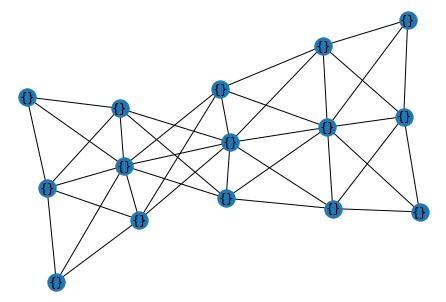

In [43]:
nx.draw(d_left['0'], labels=d_left['0'].nodes)

In [27]:
#nx.draw(d_right['0'], labels=d_right['0'].nodes)

In [41]:
d_left['0'].nodes

NodeView(('s', 'i', 'm', 'g', 't', 'd', 'h', 'a', 'q', 'f', 'b', 'k', 'v', 'y', 'o'))